In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
def getDfFromDrive(url_path):
    """La siguiente funcion obtiene el archivo en google Spreadsheet, lo transforma en un dataframe 
    y obtiene la columna a trabajar que es la columna de Salario mensual NETO y devuelve un numpy array luego 
    de haber borrado los valores nulos de la columna.
    
    """
    path = f"https://drive.google.com/uc?export=download&id={url_path.split('/')[-2]}"
    return pd.read_csv(path)

## Solution 1

Cargar este archivo en Python. Realizar estadísticas descriptivas básicas

In [3]:
path = "https://drive.google.com/file/d/1Msf9fKLNyQJFmZbPecSe1G23kjkPg-ap/view?usp=sharing"
df = getDfFromDrive(path) 

In [4]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [5]:
numeric_columns = list(df.select_dtypes("number").columns)    
df[numeric_columns].describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [6]:
categorical_columns = list(df.select_dtypes("object").columns)
df[categorical_columns].describe()

,Employee_Name,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date
count,311,311,311,311,311,311,311,311,311,311,104,311,311,311,311,311,311,311
unique,311,32,28,307,2,5,3,4,6,101,96,18,3,6,21,9,4,137
top,"Warfield, Sarah",Production Technician I,MA,06/14/87,F,Single,US Citizen,No,White,1/10/2011,6/18/2013,N/A-StillEmployed,Active,Production,Kissy Sullivan,Indeed,Fully Meets,1/14/2019
freq,1,137,276,2,176,137,295,282,187,14,2,207,207,209,22,87,243,18


## Solution 2
Realizar un histograma con los salarios. Qué rango(s) de salarios son los más populares?

*Rpta:* los rangos mas populares estan entre 50k y 100k

In [7]:
path = "https://drive.google.com/file/d/1Msf9fKLNyQJFmZbPecSe1G23kjkPg-ap/view?usp=sharing"
dfChallenge = getDfFromDrive(path) 

In [8]:
mpl.style.use('seaborn')

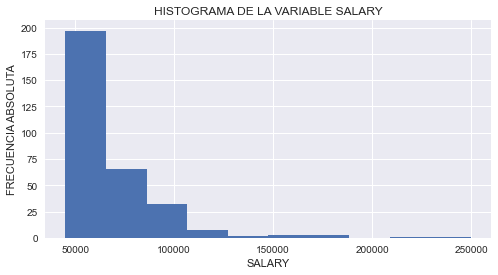

In [9]:
def getHistogramByDf(df, column):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.hist(df[column].values.flatten(), bins=10)
    ax.set_title(f"Histograma de la Variable {column}".upper())
    ax.set_xlabel(column.upper())
    ax.set_ylabel('Frecuencia absoluta'.upper())

getHistogramByDf(dfChallenge, "Salary")

## Solution 3

Realizar un gráfico de violín con los salarios, discriminados por género. 


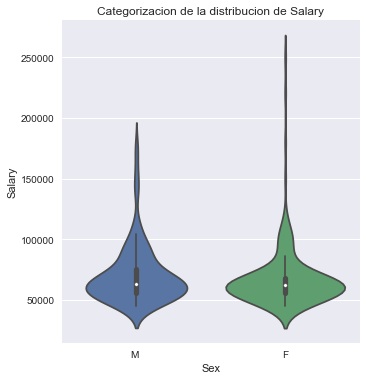

In [13]:
def getViolinPlot(df, xAxis, yAxis):
    ax = sns.catplot(data=df, kind='violin', x=xAxis, y=yAxis, split=True)
    ax.set(xlabel=xAxis, 
           ylabel=yAxis, 
           title=f"Categorizacion de la distribucion de {yAxis}")

getViolinPlot(dfChallenge, 'Sex', 'Salary')

## Solution 4
Graficar la serie de tiempo correspondiente a la fecha de contratación (DateofHire)


In [14]:
path = "https://drive.google.com/file/d/1Msf9fKLNyQJFmZbPecSe1G23kjkPg-ap/view?usp=sharing"
dfSolution = getDfFromDrive(path) 

[Text(0.5, 0, 'Fecha de Contratacion'),
 Text(0, 0.5, 'Densidad'),
 Text(0.5, 1.0, 'Distribución de Contratos')]

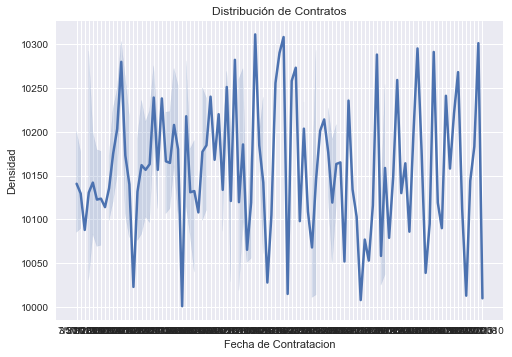

In [15]:
plt.figure()
ax = sns.lineplot(data=dfSolution, x='DateofHire', y='EmpID', palette="tab10", linewidth=2.5)
ax.set(xlabel='Fecha de Contratacion', ylabel='Densidad', title='Distribución de Contratos')

[Text(0.5, 0, 'Fecha de Contratacion'),
 Text(0, 0.5, 'Densidad'),
 Text(0.5, 1.0, 'Distribución de Contratos')]

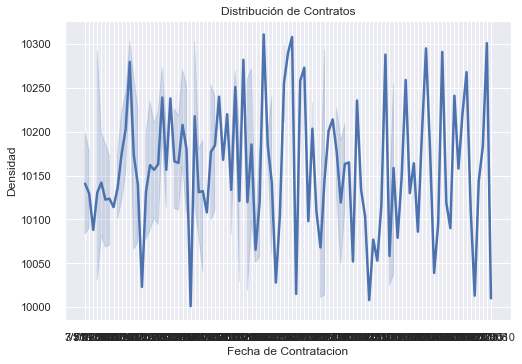

In [16]:
plt.figure()
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.lineplot(data=dfSolution, x='DateofHire', y='EmpID', palette="tab10", linewidth=2.5)
ax.set(xlabel='Fecha de Contratacion', ylabel='Densidad', title='Distribución de Contratos')